In [ ]:
#lr cound avg auroc graphic 6 seeds ISNetDANN

In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

In [ ]:
#================== Lr AUROC ISNetDANN - No Finding Sex =================

In [21]:
base_path = Path('/home/lchanch/models/ISNetDANN/eval/independet_runs')
attributes = ['sex']

df_lr_results = {}

# Read the files corresponding to each attribute
for attr in attributes:
    lr_file = base_path / f'lr_cond_avg_results_all_{attr}.csv'
    df_lr_results[attr] = pd.read_csv(lr_file)

In [24]:
df_lr_results['sex']['seed'].unique()

array([5, 3, 1, 4, 0, 2])

In [25]:
df_inde_ISNetDANN_lr=df_lr_results['sex'].copy()
df_inde_ISNetDANN_lr.insert(0, "model", "ISNetDANN")
df_inde_ISNetDANN_lr=df_inde_ISNetDANN_lr[['store_name','seed','hparams_seed','model','task','attr', 'AUROC_te']]
df_inde_ISNetDANN_lr

,store_name,seed,hparams_seed,model,task,attr,AUROC_te
0,8814630466f9f559b569632bd4ed860c,5,8,ISNetDANN,No Finding,sex,0.782204
1,8720e53a92609c0ef902d64983f230f7,3,8,ISNetDANN,No Finding,sex,0.787207
3,a21c19a8a4043056348dd4fce57d7815,1,8,ISNetDANN,No Finding,sex,0.786330
4,1a4f01c3ecaf6cd2ec608cce5d8cd1a3,4,8,ISNetDANN,No Finding,sex,0.775081
5,dac6515f78e7035a76c2bd534bc1cd63,0,8,ISNetDANN,No Finding,sex,0.782694
6,e71e3c622a942657993e10cf0b5e652b,2,8,ISNetDANN,No Finding,sex,0.776827


In [26]:
df_inde_ISNetDANN_lr.describe()

,seed,hparams_seed,AUROC_te
count,6.000000,6.0,6.000000
mean,2.500000,8.0,0.781724
std,1.870829,0.0,0.004910
min,0.000000,8.0,0.775081
25%,1.250000,8.0,0.778171
50%,2.500000,8.0,0.782449
75%,3.750000,8.0,0.785421
max,5.000000,8.0,0.787207


In [27]:
#95% CI boostrap
def bootstrap_ci(values, n_bootstrap=1000, alpha=0.05):
    values = np.asarray(values, dtype=float)
    boot_means = []

    for _ in range(n_bootstrap):# Bootstrap procedure: resample the data with replacement n_bootstrap times
        sample = np.random.choice(values, size=len(values), replace=True) # Draw a bootstrap sample of the same size as the original data
        boot_means.append(sample.mean()) # Compute the statistic of interest (mean) for the bootstrap sample

    # Compute the lower bound of the (1 - alpha) confidence interval using the percentile method
    ci_low = np.percentile(boot_means, 100 * alpha / 2) 
    ci_high = np.percentile(boot_means, 100 * (1 - alpha / 2))

    return ci_low, ci_high

In [28]:
metrics = [
    'AUROC_te'
]

rows = []

for metric in metrics:

    values = df_inde_ISNetDANN_lr[metric]

    mean = values.mean()
    std = values.std(ddof=1)

    ci_low, ci_high = bootstrap_ci(values)

    rows.append({
        'model': 'ISNetDANN',
        'task': 'No finding',
        'attr': 'sex',
        'metric': metric,
        'mean': mean,
        'std': std,
        'ci95_low': ci_low,
        'ci95_high': ci_high,
        'ci95_range': ci_high - ci_low
    })

df_overall_ISNetDANN_lr = pd.DataFrame(rows)
df_overall_ISNetDANN_lr


,model,task,attr,metric,mean,std,ci95_low,ci95_high,ci95_range
0,ISNetDANN,No finding,sex,AUROC_te,0.781724,0.00491,0.778036,0.785118,0.007082


In [ ]:
#================== Lr AUROC ISNetDANN - No Finding Sex =================

In [ ]:
#================== Lr AUROC ERM - No Finding Sex =================

In [29]:
base_path = Path('/home/lchanch/models/ERM/eval/independent_runs')
attributes = ['sex']

df_lr_results_erm = {}

# Read the files corresponding to each attribute
for attr in attributes:
    lr_file = base_path / f'lr_cond_avg_results_all_{attr}.csv'
    df_lr_results_erm[attr] = pd.read_csv(lr_file)

In [30]:
df_lr_results_sex_erm=df_lr_results_erm['sex']
df_lr_results_sex_erm = df_lr_results_sex_erm.loc[
    df_lr_results_sex_erm['task'] == 'No Finding'
]
df_lr_results_sex_erm=df_lr_results_sex_erm[df_lr_results_sex_erm['seed'].between(0, 5)]
df_lr_results_sex_erm['seed'].unique()

array([4, 1, 0, 2, 5, 3])

In [31]:
df_inde_ERM_lr=df_lr_results_sex_erm.copy()
df_inde_ERM_lr.insert(0, "model", "ERM")
df_inde_ERM_lr=df_inde_ERM_lr[['store_name','seed','hparams_seed','model','task','attr', 'AUROC_te']]
df_inde_ERM_lr

,store_name,seed,hparams_seed,model,task,attr,AUROC_te
10,3350f06b5e1bb6f627302ae407838e35,4,1,ERM,No Finding,sex,0.856850
11,1a1e111ccdd14e61a1884db47b8d0117,1,1,ERM,No Finding,sex,0.818572
16,8567bca8c4876916928b7465a52cdeae,0,1,ERM,No Finding,sex,0.885440
17,380016e06e9472175f3b7c854498835c,2,1,ERM,No Finding,sex,0.837012
18,f5b0c222bab261c9ee0dd37b13deae06,5,1,ERM,No Finding,sex,0.877372
19,2cb69914d57bdca16c8ae3e2d3ab2b9c,3,1,ERM,No Finding,sex,0.868355


In [32]:
metrics = [
    'AUROC_te'
]

rows = []

for metric in metrics:

    values = df_inde_ERM_lr[metric]

    mean = values.mean()
    std = values.std(ddof=1)

    ci_low, ci_high = bootstrap_ci(values)

    rows.append({
        'model': 'ERM',
        'task': 'No finding',
        'attr': 'sex',
        'metric': metric,
        'mean': mean,
        'std': std,
        'ci95_low': ci_low,
        'ci95_high': ci_high,
        'ci95_range': ci_high - ci_low
    })

df_overall_ERM_lr = pd.DataFrame(rows)
df_overall_ERM_lr

,model,task,attr,metric,mean,std,ci95_low,ci95_high,ci95_range
0,ERM,No finding,sex,AUROC_te,0.857267,0.025411,0.838009,0.873793,0.035785


In [ ]:
#================== Lr AUROC ERM - No Finding Sex =================

In [ ]:
#================== Lr AUROC Comparison- No Finding Sex =================

In [33]:
df_overall_per_comparison = pd.concat([df_overall_ERM_lr, df_overall_ISNetDANN_lr], axis=0)
df_overall_per_comparison 

,model,task,attr,metric,mean,std,ci95_low,ci95_high,ci95_range
0,ERM,No finding,sex,AUROC_te,0.857267,0.025411,0.838009,0.873793,0.035785
0,ISNetDANN,No finding,sex,AUROC_te,0.781724,0.004910,0.778036,0.785118,0.007082


In [34]:
AUROC_ERM=df_overall_per_comparison .iloc[0, 4]
AUROC_ISNetDANN=df_overall_per_comparison.iloc[1, 4]
print("AUROC-te ERM:", AUROC_ERM)
print("AUROC-te ISNetDANN:", AUROC_ISNetDANN)


mean_diff=AUROC_ERM-AUROC_ISNetDANN
print("mean_diff:", mean_diff)

per_mean_diff=((AUROC_ERM-AUROC_ISNetDANN)/AUROC_ERM)*100
print("% mean_diff:", per_mean_diff)

AUROC-te ERM: 0.8572667895579742
AUROC-te ISNetDANN: 0.7817236634321891
mean_diff: 0.07554312612578507
% mean_diff: 8.812090593727163


In [35]:
#individual samples
df_indep_comparison = pd.concat([df_inde_ERM_lr, df_inde_ISNetDANN_lr], axis=0)
df_indep_comparison 


,store_name,seed,hparams_seed,model,task,attr,AUROC_te
10,3350f06b5e1bb6f627302ae407838e35,4,1,ERM,No Finding,sex,0.856850
11,1a1e111ccdd14e61a1884db47b8d0117,1,1,ERM,No Finding,sex,0.818572
16,8567bca8c4876916928b7465a52cdeae,0,1,ERM,No Finding,sex,0.885440
17,380016e06e9472175f3b7c854498835c,2,1,ERM,No Finding,sex,0.837012
18,f5b0c222bab261c9ee0dd37b13deae06,5,1,ERM,No Finding,sex,0.877372
19,2cb69914d57bdca16c8ae3e2d3ab2b9c,3,1,ERM,No Finding,sex,0.868355
0,8814630466f9f559b569632bd4ed860c,5,8,ISNetDANN,No Finding,sex,0.782204
1,8720e53a92609c0ef902d64983f230f7,3,8,ISNetDANN,No Finding,sex,0.787207
3,a21c19a8a4043056348dd4fce57d7815,1,8,ISNetDANN,No Finding,sex,0.786330
4,1a4f01c3ecaf6cd2ec608cce5d8cd1a3,4,8,ISNetDANN,No Finding,sex,0.775081


In [36]:
from scipy import stats

In [37]:
AUROC_isnet_all=df_indep_comparison.loc[df_indep_comparison ['model'] == 'ISNetDANN', 'AUROC_te']
AUROC_erm_all=df_indep_comparison.loc[df_indep_comparison ['model'] == 'ERM', 'AUROC_te']

In [38]:
t_stat, p_value = stats.ttest_ind(
    AUROC_isnet_all,
    AUROC_erm_all,
    equal_var=False  #Welch
)

t_stat, p_value

(-7.149675530562394, 0.0006130349018725234)

In [39]:
stats.mannwhitneyu(AUROC_isnet_all, AUROC_erm_all, alternative="two-sided")

MannwhitneyuResult(statistic=0.0, pvalue=0.0021645021645021645)

In [ ]:
#================== Lr AUROC Comparison- No Finding Sex =================

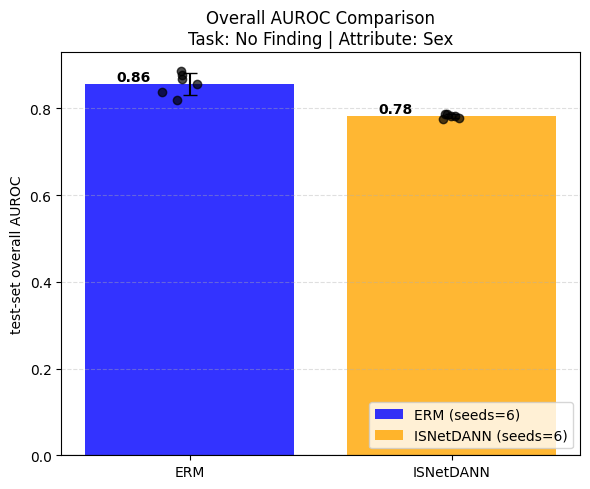

In [41]:
import numpy as np
import matplotlib.pyplot as plt

colors = {"ERM": "blue", "ISNetDANN": "orange"}
model_order = ["ERM", "ISNetDANN"]


df = df_indep_comparison .copy()


df_stats = (
    df.groupby("model")["AUROC_te"]
    .agg(AUROC_mean="mean", AUROC_std="std", seed_number="count")
    .reindex(model_order)
    .reset_index()
)


fig, ax = plt.subplots(figsize=(6, 5))


bars = ax.bar(
    df_stats["model"],
    df_stats["AUROC_mean"],
    yerr=df_stats["AUROC_std"],
    capsize=5,
    color=[colors[m] for m in df_stats["model"]],
    alpha=0.8
)

for bar, mean, std in zip(bars, df_stats["AUROC_mean"], df_stats["AUROC_std"]):
    ax.text(
        bar.get_x() + bar.get_width() * 0.15, 
        mean,                            
        f"{mean:.2f}",
        ha="left",
        va="bottom",
        fontsize=10,
        fontweight="bold"
    )


for i, model in enumerate(model_order):
    values = df[df["model"] == model]["AUROC_te"]

    jitter = np.random.normal(0, 0.04, size=len(values))

    ax.scatter(
        np.full(len(values), i) + jitter,
        values,
        color="black",
        zorder=10,
        alpha=0.7
    )


legend_labels = [
    f"{row.model} (seeds={row.seed_number})"
    for row in df_stats.itertuples()
]
ax.legend(bars, legend_labels, loc="lower right")


ax.set_ylabel("test-set overall AUROC")
ax.set_title("Overall AUROC Comparison\nTask: No Finding | Attribute: Sex")
ax.axhline(0, color="black", linewidth=0.8)
ax.grid(axis="y", linestyle="--", alpha=0.4)

plt.tight_layout()
plt.show()


In [15]:
attributes = [
    'lr_AUROC_sex',
    'lr_AUROC_ethnicity',
    'lr_AUROC_sex_ethnicity',
    'lr_AUROC_age'
]

tasks = sorted(df_lr_results['sex']['task'].unique())

rows = []

for task in tasks:
    row = {'task': task}

    for attr in attributes:
        attr_key = attr.replace('lr_AUROC_', '')
        values = df_lr_results[attr_key].loc[
            df_lr_results[attr_key]['task'] == task, 'AUROC_te'
        ].values

        mean = values.mean()
        std = values.std(ddof=1)

        ci_low, ci_high = bootstrap_ci(values)

        row[(attr, 'mean')] = mean
        row[(attr, 'std')] = std
        row[(attr, 'ci95_low')] = ci_low
        row[(attr, 'ci95_high')] = ci_high
        row[(attr, 'ci95_range')] = ci_high - ci_low

    rows.append(row)

df_lr_AUROC = pd.DataFrame(rows)

# Convert columns to MultiIndex
df_lr_AUROC.columns = pd.MultiIndex.from_tuples(
    [('task', '') if c == 'task' else c for c in df_lr_AUROC.columns]
)


In [16]:
df_lr_AUROC

task lr_AUROC_sex                                           \
                            mean       std  ci95_low ci95_high ci95_range   
0      Cardiomegaly     0.799960  0.021144  0.784470  0.815445   0.030975   
1        No Finding     0.857267  0.025411  0.837711  0.874208   0.036497   
2  Pleural Effusion     0.873556  0.009376  0.866973  0.881331   0.014357   
3      Pneumothorax     0.794142  0.013304  0.785839  0.803985   0.018146   

  lr_AUROC_ethnicity                                ...  \
                mean       std  ci95_low ci95_high  ...   
0           0.672484  0.008380  0.666830  0.678840  ...   
1           0.689168  0.006441  0.684265  0.693620  ...   
2           0.667446  0.007408  0.662233  0.672502  ...   
3           0.614688  0.009720  0.607689  0.622227  ...   

  lr_AUROC_sex_ethnicity                                           \
                    mean       std  ci95_low ci95_high ci95_range   
0               0.714494  0.010133  0.707943  0.722519   0.014576   
1               0.749438  0.016794  0.738236  0.761392   0.023157   
2               0.750323  0.006334  0.745556  0.754278   0.008722   
3               0.682987  0.013113  0.673582  0.692049   0.018468   

  lr_AUROC_age                                           
          mean       std  ci95_low ci95_high ci95_range  
0     0.705294  0.006795  0.700723  0.710393   0.009670  
1     0.723447  0.012132  0.713657  0.732305   0.018648  
2     0.710225  0.004335  0.707174  0.713757   0.006583  
3     0.681299  0.008612  0.675607  0.687274   0.011667  

[4 rows x 21 columns]

In [17]:
task_order = ['No Finding', 'Pleural Effusion', 'Pneumothorax', 'Cardiomegaly']

#Reorder
df_lr_AUROC = df_lr_AUROC.set_index('task').loc[task_order].reset_index()
df_lr_AUROC

task lr_AUROC_sex                                           \
                            mean       std  ci95_low ci95_high ci95_range   
0        No Finding     0.857267  0.025411  0.837711  0.874208   0.036497   
1  Pleural Effusion     0.873556  0.009376  0.866973  0.881331   0.014357   
2      Pneumothorax     0.794142  0.013304  0.785839  0.803985   0.018146   
3      Cardiomegaly     0.799960  0.021144  0.784470  0.815445   0.030975   

  lr_AUROC_ethnicity                                ...  \
                mean       std  ci95_low ci95_high  ...   
0           0.689168  0.006441  0.684265  0.693620  ...   
1           0.667446  0.007408  0.662233  0.672502  ...   
2           0.614688  0.009720  0.607689  0.622227  ...   
3           0.672484  0.008380  0.666830  0.678840  ...   

  lr_AUROC_sex_ethnicity                                           \
                    mean       std  ci95_low ci95_high ci95_range   
0               0.749438  0.016794  0.738236  0.761392   0.023157   
1               0.750323  0.006334  0.745556  0.754278   0.008722   
2               0.682987  0.013113  0.673582  0.692049   0.018468   
3               0.714494  0.010133  0.707943  0.722519   0.014576   

  lr_AUROC_age                                           
          mean       std  ci95_low ci95_high ci95_range  
0     0.723447  0.012132  0.713657  0.732305   0.018648  
1     0.710225  0.004335  0.707174  0.713757   0.006583  
2     0.681299  0.008612  0.675607  0.687274   0.011667  
3     0.705294  0.006795  0.700723  0.710393   0.009670  

[4 rows x 21 columns]

In [18]:
df_lr_AUROC['lr_AUROC_ethnicity']

,mean,std,ci95_low,ci95_high,ci95_range
0,0.689168,0.006441,0.684265,0.693620,0.009355
1,0.667446,0.007408,0.662233,0.672502,0.010269
2,0.614688,0.009720,0.607689,0.622227,0.014538
3,0.672484,0.008380,0.666830,0.678840,0.012010


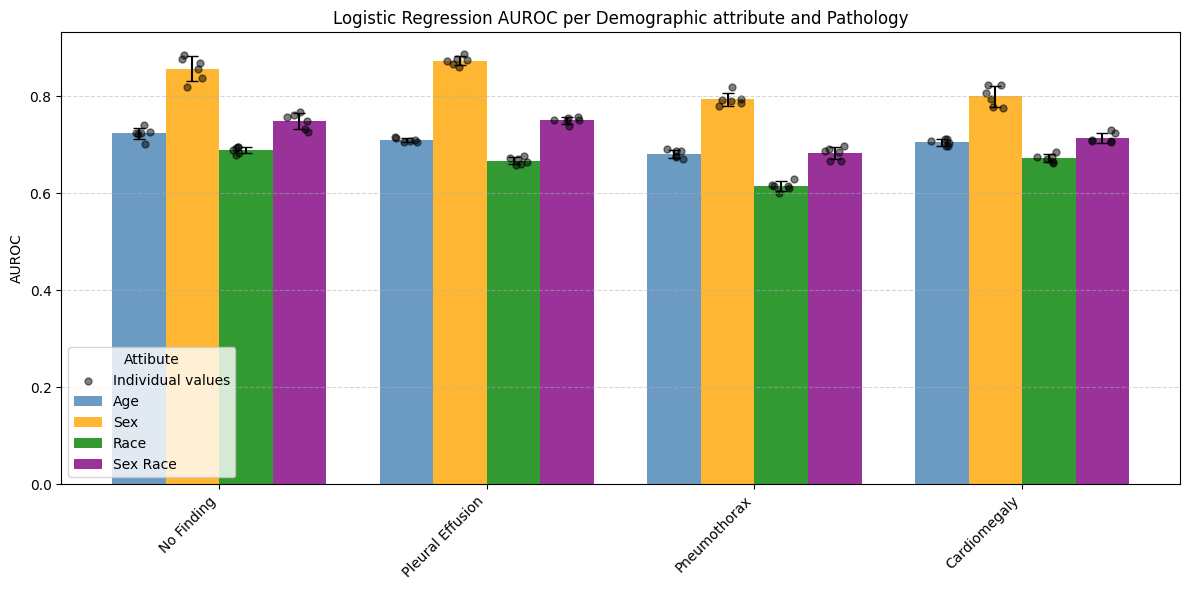

In [20]:
attributes = ['lr_AUROC_age', 'lr_AUROC_sex', 'lr_AUROC_ethnicity', 'lr_AUROC_sex_ethnicity']
colors = ['steelblue', 'orange', 'green', 'purple']
tasks = df_lr_AUROC[('task', '')].tolist()
#tasks = ['No Finding', 'Pleural Effusion', 'Pneumothorax','Cardiomegaly']
x = np.arange(len(tasks))  # X positions according to tasks
width = 0.2  # Bar width

# Dictionary containing the DataFrames with individual results
lr_results_dicts = {
    'lr_AUROC_age':  df_lr_results['age'].to_dict('records'),
    'lr_AUROC_sex': df_lr_results['sex'].to_dict('records'),
    'lr_AUROC_ethnicity': df_lr_results['ethnicity'].to_dict('records'),
    'lr_AUROC_sex_ethnicity': df_lr_results['sex_ethnicity'].to_dict('records'),
}

attribute_label_map = {
    'lr_AUROC_age': 'Age',
    'lr_AUROC_sex': 'Sex',
    'lr_AUROC_ethnicity': 'Race',
    'lr_AUROC_sex_ethnicity': 'Sex Race'
}


# Create the figure
plt.figure(figsize=(12, 6))

# Plot bars with error bars
for i, attr in enumerate(attributes):
    means = df_lr_AUROC[(attr, 'mean')] # extract mean from df_lr_AUROC
    stds = df_lr_AUROC[(attr, 'std')] # extract std from df_lr_AUROC
    bar_positions = x + i * width - 1.5 * width

    # Draw bar plots
    plt.bar(bar_positions, means, yerr=stds, capsize=4, width=width,
            #label=attr.replace('lr_AUROC_', '').replace('_', ' ').title(),
            label=attribute_label_map[attr],
            color=colors[i], alpha=0.8)

    # Individual points with jitter
    lr_AUROC_values = defaultdict(list)
    
    for entry in lr_results_dicts[attr]: # dict containing all individual results
        lr_AUROC_values[entry['task']].append(entry['AUROC_te']) # group by task


    for j, task in enumerate(tasks):
        values = lr_AUROC_values[task]
        x_jitter = 0.1 * (np.random.rand(len(values)) - 0.5)
        plt.scatter([bar_positions[j] + jitter for jitter in x_jitter],
                    values, color='black', alpha=0.5, s=25,
                    label='Individual values' if i == 0 and j == 0 else "")

# Labels and styling
plt.xticks(x, tasks, rotation=45, ha='right')
plt.ylabel("AUROC")
plt.title("Logistic Regression AUROC per Demographic attribute and Pathology")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(title="Attibute")
plt.tight_layout()
plt.show()